# Data Analysis with Python

## 1.Import Data from Module

In [2]:
import pandas as pd
import numpy as np

In [3]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 2. Analyzing Individual Feature Patterns using Visualization

In [4]:
%%capture
! pip install seaborn

 Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

 ### How to choose the right visualization method?

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [33]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


 ### Question #1:Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.

In [6]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  


,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Question #2:Find the scatterplot of "engine-size" and "price"

## 1.Continuous numerical variables:
Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

**Here engine-size,price,highway-mpg,peak-rpm all are Continuous numerical variables.**

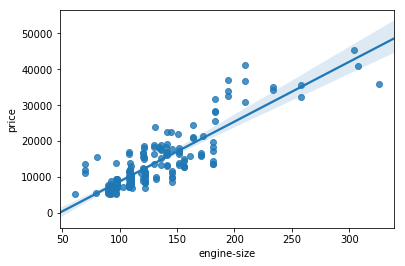

In [14]:
sns.regplot(x="engine-size", y="price", data=df)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [17]:
correlation=df['engine-size'].corr(df['price'])
print(correlation)

0.8723351674455198


As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

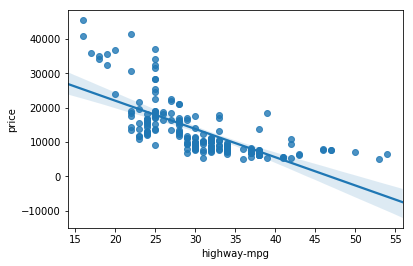

In [18]:
sns.regplot(x='highway-mpg',y='price',data=df)

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [19]:
correlation=df['highway-mpg'].corr(df['price'])
print(correlation)

-0.704692265058953


Let's see if "Peak-rpm" as a predictor variable of "price".

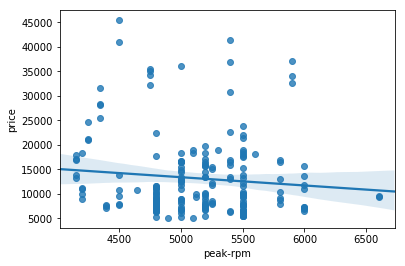

In [24]:
sns.regplot(x='peak-rpm', y='price', data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' 

In [26]:
corelation=df['peak-rpm'].corr(df['price'])
print(corelation)

-0.10161587407588138


### 2.Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

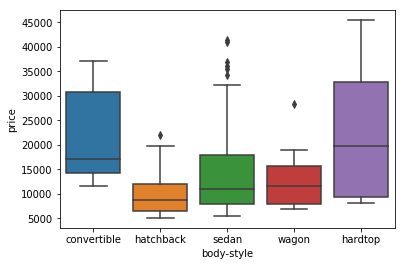

In [7]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.

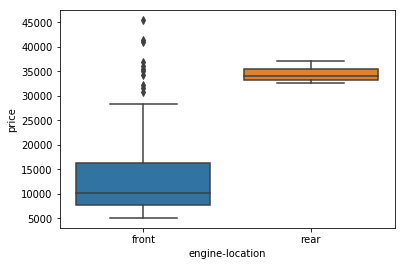

In [35]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.



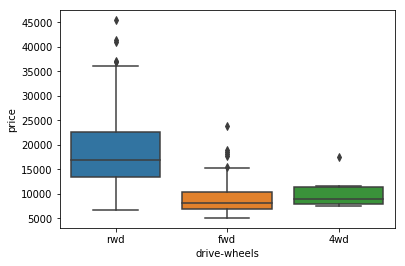

In [36]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

### 3. Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

1.the count of that variable

2.the mean

3.the standard deviation (std)

4.the minimum value

5.the IQR (Interquartile Range: 25%, 50% and 75%)

6.the maximum value

In [37]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object'

In [38]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts
Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [39]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a Dataframe

In [41]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


### 4. Basics of Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [51]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

We see that there are 3 different categories of drive wheels.

In [8]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [9]:
# grouping results
df_group_test = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_test

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

We can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.

In [10]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. 

In [69]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table.

### 5. Correlation and Causation

### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

We can obtain this information using "stats" module in the "scipy" library.

In [11]:
from scipy import stats

### Wheel-base vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [12]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

### Horsepower vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [73]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.36905742825998e-48


Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

### Length vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [75]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466159053e-30


Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### Width vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price'.

In [76]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481426e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Engine-size vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'.

In [77]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### Bore vs Price
Let's calculate the Pearson Correlation Coefficient and P-value o

In [78]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17


Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

## ANOVA: Analysis of Variance

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

### Drive Wheels
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

In [17]:
### df_gptest is the previously created grouped dataframe.
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels']) 
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can obtain the values of the method group using the method "get_group".

In [20]:
grouped_test2.get_group('fwd')['price']

3      13950.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
17      5151.0
18      6295.0
19      6575.0
20      5572.0
21      6377.0
22      7957.0
23      6229.0
24      6692.0
25      7609.0
26      8558.0
27      8921.0
28     12964.0
29      6479.0
30      6855.0
31      5399.0
32      6529.0
33      7129.0
34      7295.0
35      7295.0
36      7895.0
37      9095.0
38      8845.0
39     10295.0
40     12945.0
41     10345.0
        ...   
142     7463.0
143    10198.0
146     5348.0
147     6338.0
148     6488.0
149     6918.0
152     6938.0
153     7198.0
154     7898.0
155     7788.0
156     7738.0
157     8358.0
158     9258.0
169     8948.0
170    10698.0
171     9988.0
172    10898.0
173    11248.0
178     7775.0
179     7975.0
180     7995.0
181     8195.0
182     8495.0
183     9495.0
184     9995.0
185    11595.0
186     9980.0
187    13295.0
188    13845.0
189    12290.0
Name: price, Length: 118, dtype: float64

In [21]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

### Separately: fwd and rwd

In [22]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


### 4wd and rwd

In [23]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


### 4wd and fwd

In [24]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


### Conclusion

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

1.Length

2.Width

3.Curb-weight

4.Engine-size

5.Horsepower

6.City-mpg

7.Highway-mpg

8.Wheel-base

9.Bore

Categorical variables:

1.Drive-wheels